## 1 Defining the question 

 ### 1.1 Specifying the question 

 ### 1.2 Metric for success 

In [ ]:
A confidence level of 95% is used to test the hypothesis

## 2 Loading the data into a Pandas DataFrame <br>

### 2.1 Importing the libraries we will need 

In [296]:
# Importing the libraries we will use for analysis
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas_profiling as pp
sns.set_style('darkgrid')
from scipy import stats
from statsmodels.stats import weightstats as stests


### 2.2 creating a dataframe from our dataset

In [131]:
# Loading the dataset into a pandas dataframe
df=pd.read_csv('autolib_daily_events_postal_code.csv')

In [132]:
# Viewing the first five rows in our dataset
df.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


In [133]:
# Viewing the bottom five rows in our dataset
df.tail()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
16080,95880,6/15/2018,1440,4,weekday,15,10,0,0,2,3,0,0
16081,95880,6/16/2018,1440,5,weekend,19,19,0,0,2,1,0,0
16082,95880,6/17/2018,1440,6,weekend,33,35,1,1,0,0,0,0
16083,95880,6/18/2018,1440,0,weekday,11,14,3,5,2,2,0,0
16084,95880,6/19/2018,1370,1,weekday,2,2,2,1,0,0,0,0


In [134]:
# Checking the data types of each column in our dataset
df.dtypes

Postal code                int64
date                      object
n_daily_data_points        int64
dayOfWeek                  int64
day_type                  object
BlueCars_taken_sum         int64
BlueCars_returned_sum      int64
Utilib_taken_sum           int64
Utilib_returned_sum        int64
Utilib_14_taken_sum        int64
Utilib_14_returned_sum     int64
Slots_freed_sum            int64
Slots_taken_sum            int64
dtype: object

In [135]:
# Checking the datasets information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 13 columns):
Postal code               16085 non-null int64
date                      16085 non-null object
n_daily_data_points       16085 non-null int64
dayOfWeek                 16085 non-null int64
day_type                  16085 non-null object
BlueCars_taken_sum        16085 non-null int64
BlueCars_returned_sum     16085 non-null int64
Utilib_taken_sum          16085 non-null int64
Utilib_returned_sum       16085 non-null int64
Utilib_14_taken_sum       16085 non-null int64
Utilib_14_returned_sum    16085 non-null int64
Slots_freed_sum           16085 non-null int64
Slots_taken_sum           16085 non-null int64
dtypes: int64(11), object(2)
memory usage: 1.6+ MB


In [139]:
# checking the shape of our dataset
df.shape

# The dataset has 16085 rows and 13 columns

(16085, 13)

In [138]:
# Printing out the Profile Report of the dataset using pandas profiling
pp.ProfileReport(df)

#  3. Tidying up the Dataset

In [141]:
# lowering the case of column names and replacing spaces with underscore for uniformity
df.columns=df.columns.str.lower().str.replace(' ', '_')

In [143]:
# Printing out the cleaned up column names
df.columns

Index(['postal_code', 'date', 'n_daily_data_points', 'dayofweek', 'day_type',
       'bluecars_taken_sum', 'bluecars_returned_sum', 'utilib_taken_sum',
       'utilib_returned_sum', 'utilib_14_taken_sum', 'utilib_14_returned_sum',
       'slots_freed_sum', 'slots_taken_sum'],
      dtype='object')

### 3.1 Missing and duplicated values

In [144]:
# Missing values
# Checking if the dataset has any missing values
df.isnull().sum()


# The dataset has no null values

postal_code               0
date                      0
n_daily_data_points       0
dayofweek                 0
day_type                  0
bluecars_taken_sum        0
bluecars_returned_sum     0
utilib_taken_sum          0
utilib_returned_sum       0
utilib_14_taken_sum       0
utilib_14_returned_sum    0
slots_freed_sum           0
slots_taken_sum           0
dtype: int64

In [145]:
# Checking for duplicated values
df.duplicated().sum()


# The dataset has no duplicated rows

0

### 3.2 Dropping unnecessary columns and rows 

In [146]:
# As we will only be doing analysis on bluecars, the rest of the columns were dropped.
clean=df.drop(df.iloc[:, 7:13], axis=1)
clean.head()

,postal_code,date,n_daily_data_points,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum
0,75001,1/1/2018,1440,0,weekday,110,103
1,75001,1/2/2018,1438,1,weekday,98,94
2,75001,1/3/2018,1439,2,weekday,138,139
3,75001,1/4/2018,1320,3,weekday,104,104
4,75001,1/5/2018,1440,4,weekday,114,117


In [147]:
# As we are doing analysis on Weekdays, we dropped all rows with weekend as day type
clean=clean[clean.day_type  == 'weekday']

In [148]:
# Checking if we have dropped the weekend rows
clean.day_type.unique()

array(['weekday'], dtype=object)

In [150]:
# Dropping the day type column as it's unneccessary for our analysis
clean = clean.drop(['day_type'], axis=1)

In [151]:
# Previewing our dataset
clean.head()

,postal_code,date,n_daily_data_points,dayofweek,bluecars_taken_sum,bluecars_returned_sum
0,75001,1/1/2018,1440,monday,110,103
1,75001,1/2/2018,1438,tuesday,98,94
2,75001,1/3/2018,1439,wednesday,138,139
3,75001,1/4/2018,1320,thursday,104,104
4,75001,1/5/2018,1440,friday,114,117


### 3.3 Mapping the day and month columns

In [149]:
# Mapping the day column from 0-4 to monday-friday
clean.dayofweek=clean.dayofweek.map({0:'monday', 1: 'tuesday', 2: 'wednesday', 3: 'thursday', 4: 'friday'})

In [256]:
#creating a new month column from the date column with month names
clean['month'] = pd.DatetimeIndex(clean['date']).month
clean['month'] = clean['month'].astype('category')
clean.month=clean.month.map({1:'january', 2: 'february', 3: 'march', 4: 'april', 5: 'may', 6: 'june'})

In [153]:
# Previewing the day of week column
clean.dayofweek.unique()


# The days have correctly been mapped.

array(['monday', 'tuesday', 'wednesday', 'thursday', 'friday'],
      dtype=object)

### 3.4 Outliers

Text(0.5, 1.0, 'A boxplot of sum of taken blue cars')

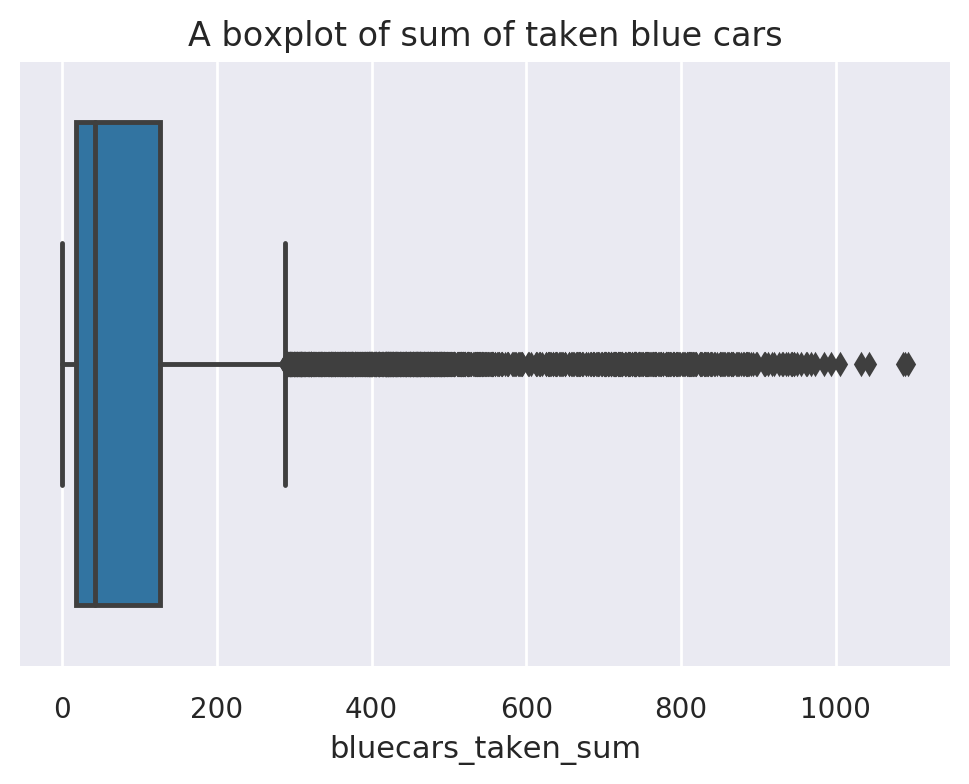

In [162]:
# Checking for outliers using a boxplot in the bluecars taken sum column
plt.figure(dpi=200)
sns.boxplot(x=clean.bluecars_taken_sum)
plt.title('A boxplot of sum of taken blue cars')

# Although the dataset has outliers, they were not removed as their prescence could plausibly be explained.

Text(0.5, 1.0, 'A boxplot of sum of returned blue cars')

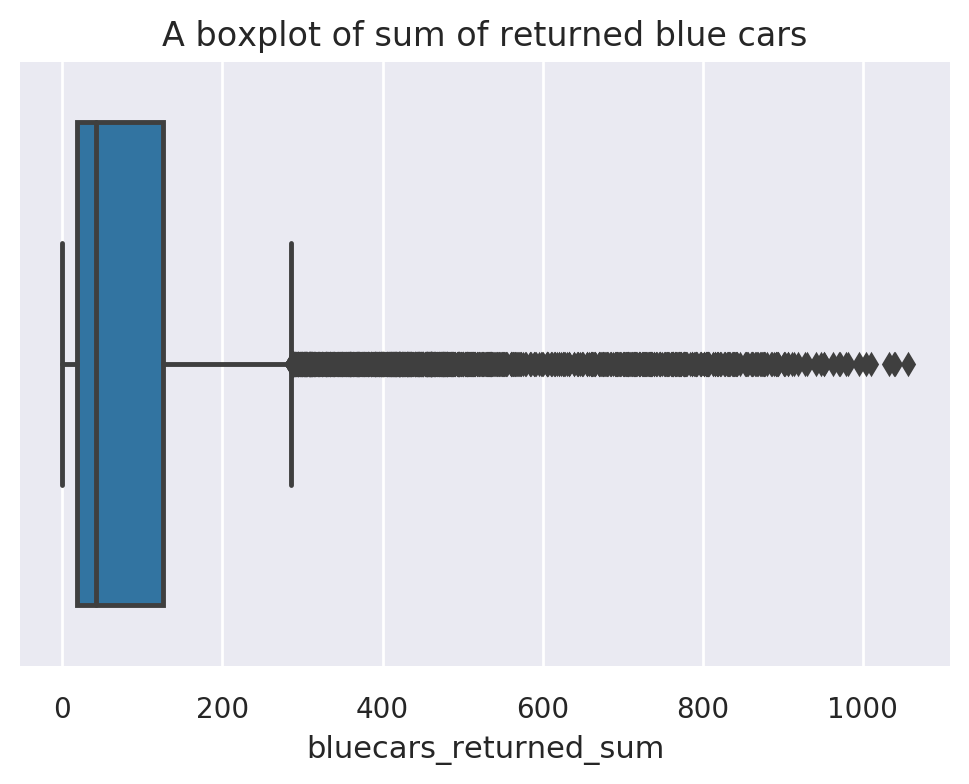

In [160]:
# Checking for outliers in the bluecars returned sum column using a boxplot
plt.figure(dpi=200)
sns.boxplot(x=clean.bluecars_returned_sum)
plt.title('A boxplot of sum of returned blue cars')

# Although the dataset has outliers, they were not removed as their prescence could plausibly be explained.

# 4 sampling

In [ ]:
# Stratified sampling was used as it strictly maintains the population ptoportion in the sample,
# this method was prefered as the data is highly heterogenous and we want to create representative
# samples from even the smallest most inaccessible subgroups of the population 

In [163]:
#confirming the number of times a postal code appears in our dataset.
clean.postal_code.value_counts()

94130    112
94450    112
94340    112
94500    112
78140    112
94700    112
95100    112
75006    112
75014    112
92150    112
92190    112
92230    112
92270    112
92310    112
92350    112
92390    112
93110    112
93230    112
93310    112
93350    112
75007    112
75015    112
75019    112
94300    112
94220    112
94140    112
92300    112
78150    112
75004    112
75012    112
        ... 
93600    112
92600    112
75016    112
75112    112
92000    112
92120    112
92160    112
92200    112
92240    112
92320    112
75017    112
92400    112
94230    112
92800    112
93360    112
93400    112
75009    112
75001    112
94100    111
94410    111
75116    111
91400    111
92110    111
92360    111
93440    108
93150    107
93370    105
92340    105
93200     90
93390     59
Name: postal_code, Length: 104, dtype: int64

In [257]:
# Creating a stratified random sample using the pandas groupby function that splits our dataset into sets then applies
# a function on each set
# The sample is 50% of the population
sample = clean.groupby('postal_code', group_keys=False).apply(lambda grouped_subset : grouped_subset.sample(frac=0.5))

In [258]:
# previewing the sample dataset
sample.head()

,postal_code,date,n_daily_data_points,dayofweek,bluecars_taken_sum,bluecars_returned_sum,month
30,75001,1/31/2018,1440,wednesday,108,110,january
2,75001,1/3/2018,1439,wednesday,138,139,january
89,75001,4/3/2018,1440,tuesday,112,111,april
97,75001,4/11/2018,1439,wednesday,125,125,april
154,75001,6/18/2018,1440,monday,122,120,june


In [259]:
# Checking the stratified sample's postal code using the value counts function
sample.postal_code.value_counts()

94150    56
75001    56
92420    56
92500    56
92600    56
92700    56
92800    56
93100    56
93260    56
93300    56
93360    56
93400    56
75005    56
94160    56
75009    56
75013    56
75017    56
93500    56
93600    56
93700    56
93800    56
94000    56
94100    56
94120    56
92400    56
92380    56
92360    56
92320    56
94410    56
94450    56
         ..
94300    56
92230    56
92190    56
92170    56
94340    56
78000    56
94500    56
78140    56
91400    56
94700    56
94800    56
95100    56
91330    56
91370    56
94230    56
75002    56
75006    56
75010    56
75014    56
75018    56
95880    56
92110    56
92130    56
92150    56
93440    54
93150    54
93370    52
92340    52
93200    45
93390    30
Name: postal_code, Length: 104, dtype: int64

### 4.1 Selecting two random postal codes used for analysis

In [260]:
# Two postal codes, 92230 and 92800, were selected at random from the stratified random sample for analysis.
# A new dataset containing only the two postal codes was created.
analysis=sample[(sample.postal_code  == 92230)| (sample.postal_code  == 92800)]
analysis.head()

,postal_code,date,n_daily_data_points,dayofweek,bluecars_taken_sum,bluecars_returned_sum,month
6543,92230,6/14/2018,1439,thursday,56,54,june
6529,92230,5/31/2018,1411,thursday,55,59,may
6432,92230,2/9/2018,1439,friday,46,50,february
6435,92230,2/12/2018,1440,monday,48,48,february
6547,92230,6/18/2018,1440,monday,51,56,june


In [261]:
# Resetting the index of the new dataframe
analysis.index = range(len(analysis.index))

In [262]:
# Previewing the dataframe
analysis.head()

,postal_code,date,n_daily_data_points,dayofweek,bluecars_taken_sum,bluecars_returned_sum,month
0,92230,6/14/2018,1439,thursday,56,54,june
1,92230,5/31/2018,1411,thursday,55,59,may
2,92230,2/9/2018,1439,friday,46,50,february
3,92230,2/12/2018,1440,monday,48,48,february
4,92230,6/18/2018,1440,monday,51,56,june


In [263]:
#checking the shape of our sample dataset
analysis.shape

# The sample dataset has 90 rows and 6 columns.

(112, 7)

In [265]:
# changing the data type of day of week to category
analysis.dayofweek=analysis.dayofweek.astype('category')
analysis.dtypes

postal_code                 int64
date                       object
n_daily_data_points         int64
dayofweek                category
bluecars_taken_sum          int64
bluecars_returned_sum       int64
month                      object
dtype: object

# 5 Exploratory Data Analysis

### 5.1 Univariate analysis

#### 5.1.1 Frequency Table

In [266]:
# Frequency tables
pd.crosstab(index=analysis.postal_code, columns='count')

# From the frequency table, the dataset has equal entries for both postal codes

col_0,count
postal_code,
92230,56
92800,56


#### 5.1.2 Measures of central tendency

In [267]:
# Creating the datasets of each postal code for univariate analysis.
a1 = analysis[analysis.postal_code==92230]
a2 = analysis[analysis.postal_code==92800]

In [268]:
# Mean
print('The mean of returned blue cars in 92230 postal code is ', a1.bluecars_returned_sum.mean())
print('\n')
print('The mean of returned blue cars in 92800 postal code is ', a2.bluecars_returned_sum.mean())
print('\n')
print('The mean of taken blue cars in 92230 postal code is ', a1.bluecars_taken_sum.mean())
print('\n')
print('The mean of taken blue cars in 92800 postal code is ', a2.bluecars_taken_sum.mean())


The mean of returned blue cars in 92230 postal code is  52.589285714285715


The mean of returned blue cars in 92800 postal code is  87.75


The mean of taken blue cars in 92230 postal code is  52.607142857142854


The mean of taken blue cars in 92800 postal code is  88.96428571428571


In [269]:
# Mode

print('The mode of returned blue cars in 92230 postal code is', a1.bluecars_returned_sum.mode())
print('\n')
print('The mode of returned blue cars in 92800 postal code is', a2.bluecars_returned_sum.mode())
print('\n')
print('The mode of taken blue cars in 92230 postal code is', a1.bluecars_taken_sum.mode())
print('\n')
print('The mode of taken blue cars in 92800 postal code is', a2.bluecars_taken_sum.mode())


The mode of returned blue cars in 92230 postal code is 0    56
dtype: int64


The mode of returned blue cars in 92800 postal code is 0    83
1    94
dtype: int64


The mode of taken blue cars in 92230 postal code is 0    51
dtype: int64


The mode of taken blue cars in 92800 postal code is 0    85
1    98
dtype: int64


In [270]:
# Median

print('The median of returned blue cars in 92230 postal code is ', a1.bluecars_returned_sum.median())
print('\n')
print('The median of returned blue cars in 92800 postal code is ', a2.bluecars_returned_sum.median())
print('\n')
print('The median of taken blue cars in 92230 postal code is ', a1.bluecars_taken_sum.median())
print('\n')
print('The median of taken blue cars in 92800 postal code is ', a2.bluecars_taken_sum.median())


The median of returned blue cars in 92230 postal code is  52.5


The median of returned blue cars in 92800 postal code is  88.5


The median of taken blue cars in 92230 postal code is  52.5


The median of taken blue cars in 92800 postal code is  87.0


#### 5.1.3 Measures of Dispersion

In [271]:
# Range
# difference between lowest and highest values
a1h=a1.bluecars_taken_sum.max()
a2h=a2.bluecars_taken_sum.max()

a1l=a1.bluecars_taken_sum.min()
a2l=a2.bluecars_taken_sum.min()

a1_h=a1.bluecars_returned_sum.max()
a2_h=a2.bluecars_returned_sum.max()

a1_l=a1.bluecars_returned_sum.min()
a2_l=a2.bluecars_returned_sum.min()

print('The range of taken blue cars in 92230 postal code is ', a1h-a1l)
print('\n')
print('The range of taken blue cars in 92800 postal code is ', a2h-a2l)
print('\n')
print('The range of returned blue cars in 92230 postal code is ', a1_h-a1_l)
print('\n')
print('The range of returned blue cars in 92800 postal code is ', a2_h-a2_l)

The range of taken blue cars in 92230 postal code is  76


The range of taken blue cars in 92800 postal code is  69


The range of returned blue cars in 92230 postal code is  77


The range of returned blue cars in 92800 postal code is  63


In [272]:
# Quartiles
# quartiles are values that divide the data into quarters when data is sorted in assorted order
print('The quartiles of taken blue cars in 92230 postal code is ', a1.bluecars_taken_sum.quantile([0.25,0.5,0.75]))
print('\n')
print('The quartiles of taken blue cars in 92800 postal code is ', a2.bluecars_taken_sum.quantile([0.25,0.5,0.75]))
print('\n')
print('The quartiles of returned blue cars in 92230 postal code is ', a1.bluecars_returned_sum.quantile([0.25,0.5,0.75]))
print('\n')
print('The quartiles of returned blue cars in 92800 postal code is ', a2.bluecars_returned_sum.quantile([0.25,0.5,0.75]))

The quartiles of taken blue cars in 92230 postal code is  0.25    48.00
0.50    52.50
0.75    57.25
Name: bluecars_taken_sum, dtype: float64


The quartiles of taken blue cars in 92800 postal code is  0.25    81.75
0.50    87.00
0.75    98.00
Name: bluecars_taken_sum, dtype: float64


The quartiles of returned blue cars in 92230 postal code is  0.25    48.75
0.50    52.50
0.75    59.00
Name: bluecars_returned_sum, dtype: float64


The quartiles of returned blue cars in 92800 postal code is  0.25    80.75
0.50    88.50
0.75    94.50
Name: bluecars_returned_sum, dtype: float64


In [273]:
# Standard Deviation
# standard deviation is a measure of how the data is spread from the mean
# the data has a low standard deviation indicating the data points are close to the mean
print('The standard deviation of taken blue cars in 92230 postal code is ', a1.bluecars_taken_sum.std())
print('\n')
print('The standard deviation of taken blue cars in 92800 postal code is ', a2.bluecars_taken_sum.std())
print('\n')
print('The standard deviation of returned blue cars in 92230 postal code is ', a1.bluecars_returned_sum.std())
print('\n')
print('The standard deviation of returned blue cars in 92800 postal code is ', a2.bluecars_returned_sum.std())

The standard deviation of taken blue cars in 92230 postal code is  10.089920391484439


The standard deviation of taken blue cars in 92800 postal code is  11.939185727852458


The standard deviation of returned blue cars in 92230 postal code is  10.346324399100803


The standard deviation of returned blue cars in 92800 postal code is  12.354241082610972


In [274]:
# Variance
print('The standard deviation of taken blue cars in 92230 postal code is ', a1.bluecars_taken_sum.var())
print('\n')
print('The standard deviation of taken blue cars in 92800 postal code is ', a2.bluecars_taken_sum.var())
print('\n')
print('The standard deviation of returned blue cars in 92230 postal code is ', a1.bluecars_returned_sum.var())
print('\n')
print('The standard deviation of returned blue cars in 92800 postal code is ', a2.bluecars_returned_sum.var())

The standard deviation of taken blue cars in 92230 postal code is  101.80649350649351


The standard deviation of taken blue cars in 92800 postal code is  142.54415584415582


The standard deviation of returned blue cars in 92230 postal code is  107.04642857142858


The standard deviation of returned blue cars in 92800 postal code is  152.62727272727273


In [275]:
# Skewness
# It is the degree of distortion from the symmetrical bell curve or the normal distribution. It measures the lack of symmetry in data distribution.
# It differentiates extreme values in one versus the other tail. A symmetrical distribution will have a skewness of 0.
print('The skewness of taken blue cars in 92230 postal code is ', a1.bluecars_taken_sum.skew())
print('\n')
print('The skewness of taken blue cars in 92800 postal code is ', a2.bluecars_taken_sum.skew())
print('\n')
print('The skewness of returned blue cars in 92230 postal code is ', a1.bluecars_returned_sum.skew())
print('\n')
print('The skewness of returned blue cars in 92800 postal code is ', a2.bluecars_returned_sum.skew())

#The data is skewed to the right in the 92800 postal code and skewed to the left in the 92230 postal code

The skewness of taken blue cars in 92230 postal code is  -0.9719535178252886


The skewness of taken blue cars in 92800 postal code is  0.5864871928640459


The skewness of returned blue cars in 92230 postal code is  -0.9356780760203495


The skewness of returned blue cars in 92800 postal code is  -0.03785104986226553


#### 4.1.4 Visualisations

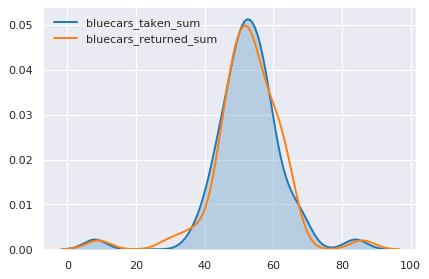

In [276]:
# Distribution curve for blue cars activity in the 92230 postal code
plt.figure(dpi=80)
sns.kdeplot(a1.bluecars_taken_sum, shade=True)
sns.kdeplot(a1.bluecars_returned_sum)
plt.legend();

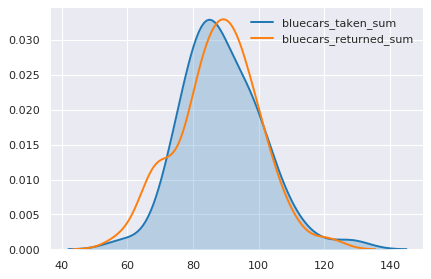

In [277]:
# Distribution curve for blue cars activity in the 92800 postal code
plt.figure(dpi=80)
sns.kdeplot(a2.bluecars_taken_sum, shade=True)
sns.kdeplot(a2.bluecars_returned_sum)
plt.legend();

### 5.2 Bivariate Analysis

In [ ]:
# Analysis of two different variables to find the relationships between them 

#### 5.2.1 Violin plots

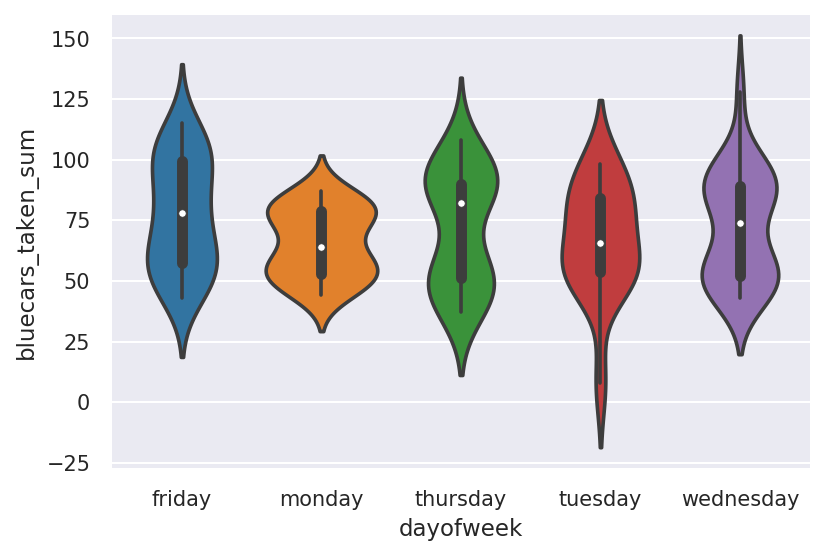

In [278]:
# A violin plot of bluecars taken against day of week.
plt.figure(dpi=150)
sns.violinplot(x='dayofweek', y='bluecars_taken_sum', data=analysis)

# We can already see that the blue cars taken were less varible on Monday

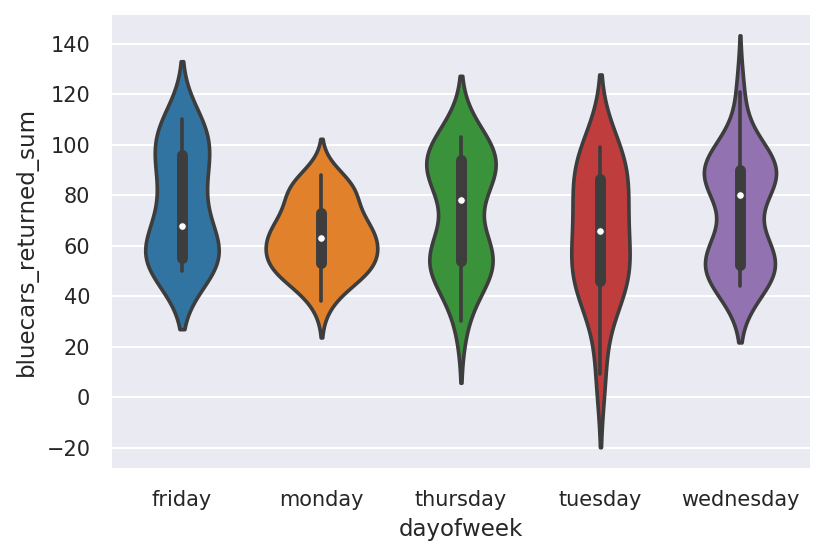

In [279]:
# A violin plot of bluecars taken against day of week.
plt.figure(dpi=150)
sns.violinplot(x='dayofweek', y='bluecars_returned_sum', data=analysis)

# We can already see that the blue cars taken were less varible on Monday

#### 5.2.2 Kernel Density Estimation plots

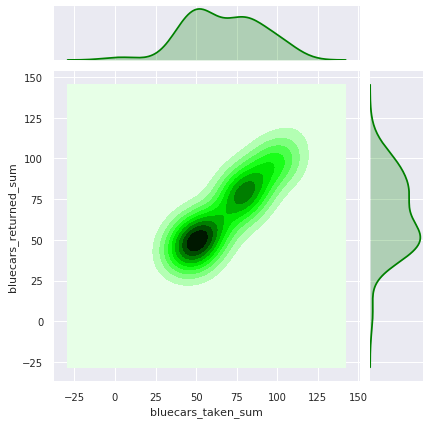

In [280]:
# A kernel density estimation plot of bluecars taken against bluecars returned in the two station.
sns.jointplot(x='bluecars_taken_sum', y='bluecars_returned_sum', kind="kde", color="g", data=df_1)

# From the plot we can see that the most frequent number of bluecars taken and returned
# is concentrated around 50 cars.

#### 5.2.3 Linear Regression plot

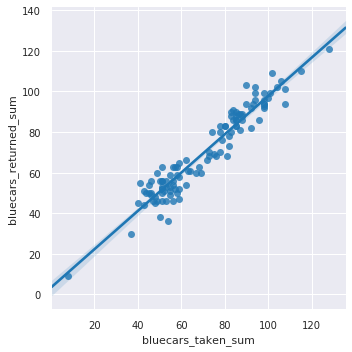

In [281]:
# A scatter plot of bluecars taken against returned with their linear relationship fitted.
sns.lmplot(x='bluecars_taken_sum', y='bluecars_returned_sum', data=analysis)

### 5.3 Multivariate Analysis

#### 5.3.1 Swarm plot

<Figure size 1500x1000 with 0 Axes>

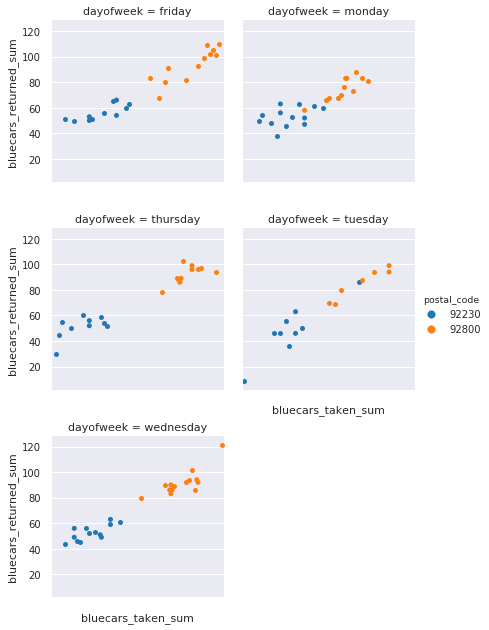

In [282]:
# A Swarm plot of relatioship between bluecars taken and returned, day of week and postal code
plt.figure(dpi=250)
g = sns.catplot(x='bluecars_taken_sum', 
                   y='bluecars_returned_sum', 
                   data=analysis, 
                   hue='postal_code',  # Color by postal code
                   col='dayofweek',  # Separate by day of week
                   kind='swarm',      # Swarmplot
               col_wrap=2, height=3)  # plot in 3 rows with 2 columns each
 
# Rotate x-axis labels
g.set_xticklabels(rotation=45)

# We can hypothesize that Postal code 92800 has the most bluecars taken and returned in the period.

<Figure size 1500x1000 with 0 Axes>

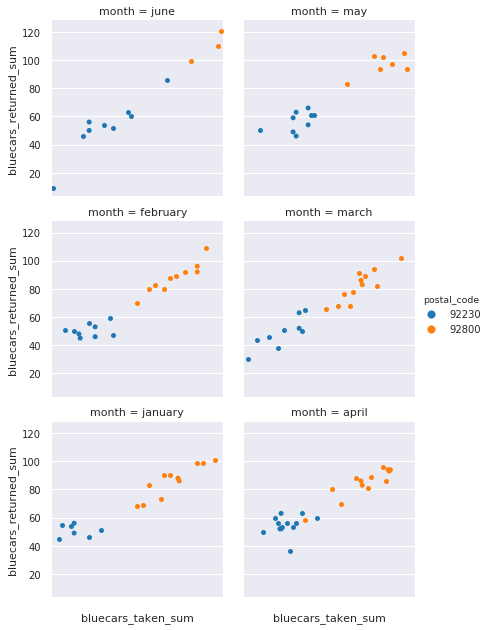

In [287]:
# A Swarm plot of relatioship between bluecars taken and returned, day of week and postal code
plt.figure(dpi=250)
g = sns.catplot(x='bluecars_taken_sum', 
                   y='bluecars_returned_sum', 
                   data=analysis, 
                   hue='postal_code',  # Color by postal code
                   col='month',  # Separate by day of week
                   kind='swarm',      # Swarmplot
               col_wrap=2, height=3)  # plot in 3 rows with 2 columns each
 
# Rotate x-axis labels
g.set_xticklabels(rotation=45)


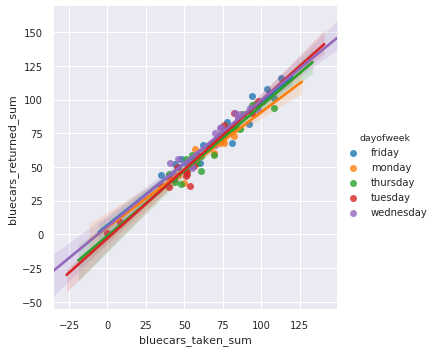

In [286]:
# A scatter plot of bluecars taken and returned with an overlaid regression line 
sns.lmplot(x='bluecars_taken_sum', y='bluecars_returned_sum', hue='dayofweek', data=df_1)

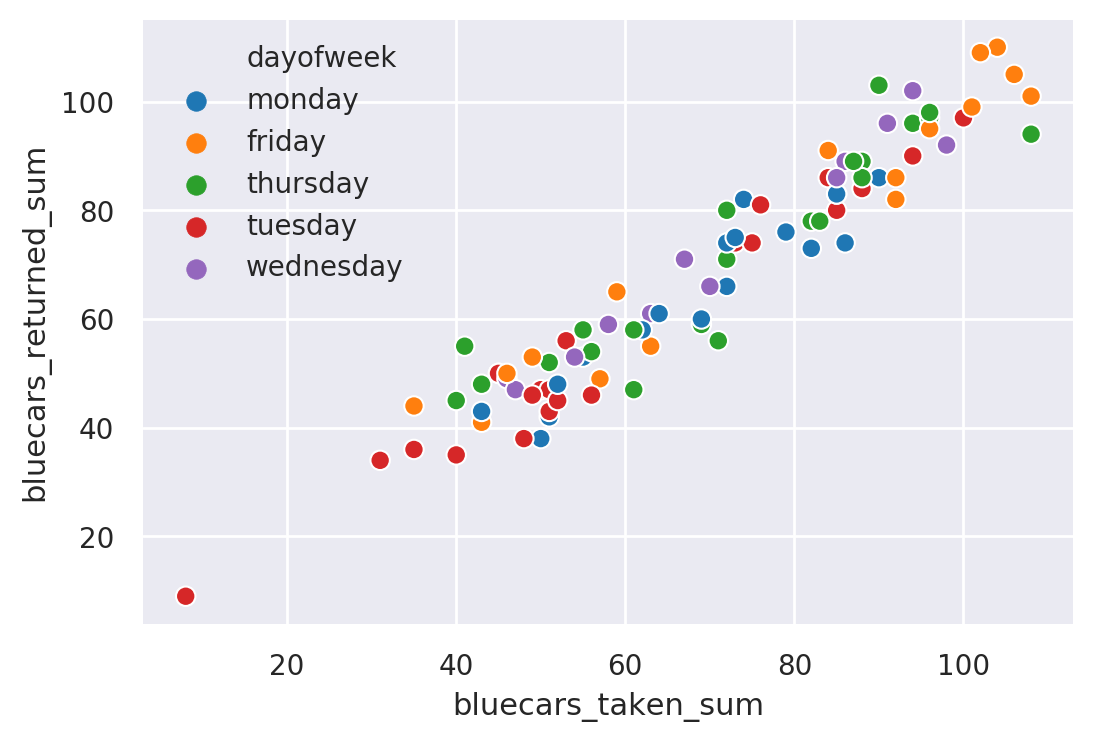

In [215]:
# A scatter plot of bluecars taken and returned with the scatters showing different days of the week.
plt.figure(dpi=200)
sns.scatterplot(x='bluecars_taken_sum', y='bluecars_returned_sum', hue='dayofweek', data=analysis)

# We can hypothesize that most activity was on Fridays and the least on Tuesdays.

#### 5.3.2 Violin plot

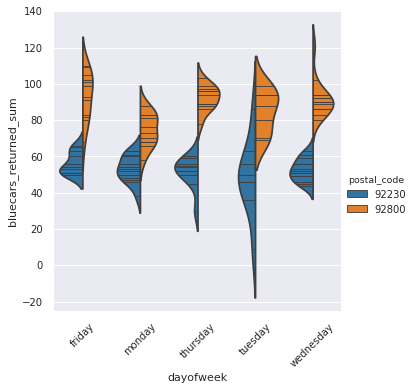

In [288]:
# Violin plot of day of week against bluecars returned didived into the two postal codes.
#plt.figure(dpi=250)
g = sns.catplot(x='dayofweek', 
                   y='bluecars_returned_sum', 
                   data=analysis, 
                   hue='postal_code',  # Color by postal code
                   kind='violin',
                   inner='stick',
                   pallete='pastel',
                   split=True)  
 
# Rotate x-axis labels
g.set_xticklabels(rotation=45)

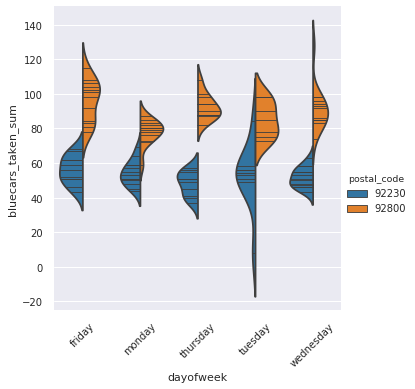

In [289]:
# Violin plot of day of week against bluecars taken didived into the two postal codes.
#plt.figure(dpi=250)
g = sns.catplot(x='dayofweek', 
                   y='bluecars_taken_sum', 
                   data=analysis, 
                   hue='postal_code',  # Color by postal code
                   kind='violin',
                   inner='stick',
                   pallete='pastel',
                   split=True)  
 
# Rotate x-axis labels
g.set_xticklabels(rotation=45)

# 6 Hypothesis

In [ ]:
# from the research question Is the number of bluecars taken in station 
# 92230 different from those taken in station 92800 on weekdays?

# The following is the null hypothesis

### 6.1 Null hypothesis

### 6.2 Alternate Hypothesis

 ### 6.3 Hypothesis testing

In [294]:
# Average of blue cars taken from both postal codes
mean1=a1.bluecars_taken_sum.mean()
mean2=a2.bluecars_taken_sum.mean()
print('The average of bluecars take from station 92230 is ', mean1)
print('\n')
print('The average of bluecars take from station 92800 is ', mean2)

The average of bluecars take from station 92230 is  52.607142857142854


The average of bluecars take from station 92800 is  88.96428571428571


In [302]:
ztest ,pval = stests.ztest(a1.bluecars_taken_sum, x2=a2.bluecars_taken_sum, value=0, alternative='two-sided')
print(float(pval))
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

7.544830115242666e-68
reject null hypothesis


# 7 Conclusion